In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [3]:
import pandas as pd
pd.read_csv("./height_weight_genders.csv")

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    coefficient, mse = least_squares(y, tx)
    print(coefficient)
    
    return y ,tx
    # by least squares vs. grid search
    # ***************************************************

In [5]:
def calculate_mse(e):
    return 1/2*np.mean(e**2)

def compute_mse(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx.dot(w)
    return calculate_mse(e)


In [6]:
def my_least_squares (y , tx):
    term1 = tx.T.dot(tx)
    term2 = tx.T.dot(y)
    optimal_weights = np.linalg.inv(term1).dot(term2)
    mse = compute_mse(y,tx,optimal_weights)
    return optimal_weights , mse

In [7]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    term1 = tx.T.dot(tx)
    term2 = tx.T.dot(y)
    optimal_weights = np.linalg.inv(term1).dot(term2)
    mse = compute_mse(y, tx, optimal_weights)
    return optimal_weights , mse
    
    # returns mse, and optimal weights
    # ***************************************************

Test it here

In [8]:
y , tx = test_your_least_squares()

[73.293922   13.47971243]


In [9]:
y.shape

(10000,)

In [10]:
weights , mse = my_least_squares(y,tx)
weights ,mse

(array([73.293922  , 13.47971243]), 15.3858878688294)

In [11]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    iter0=0
    iter1=0
    for i in w0:
        iter1=0
        for j in w1:
            w=np.array([i,j])
            losses[iter0,iter1]=compute_mse(y,tx,w)
            iter1+=1
        iter0+=1
    # ***************************************************
    return losses

In [12]:
import datetime
from grid_search import generate_w, get_best_parameters
#from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)


height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)

#print (w0_star, w1_star,loss_star)

print("w0: {i} w1:{d}, loss={loss}".format(
              i=w0_star, d=w1_star, loss=loss_star))

test_your_least_squares()

w0: 72.72727272727272 w1:13.636363636363626, loss=15.55870336860953
[73.293922   13.47971243]


(array([109.81967768,  73.68895452,  96.58434842, ...,  58.32779473,
         74.38901745,  51.59669261]),
 array([[ 1.        ,  1.94406149],
        [ 1.        ,  0.62753668],
        [ 1.        ,  2.01244346],
        ...,
        [ 1.        , -0.64968792],
        [ 1.        ,  0.69312469],
        [ 1.        , -1.14970831]]))

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [13]:
tx * tx

array([[1.        , 3.77937509],
       [1.        , 0.39380228],
       [1.        , 4.04992867],
       ...,
       [1.        , 0.42209439],
       [1.        , 0.48042183],
       [1.        , 1.3218292 ]])

In [14]:
def my_build_poly(tx , degree):
    x = tx 
    x.astype(np.float128)
    ones = np.ones((len(x),1))
    for i in range(degree-1):
        x = x * x
        tx = np.c_[tx,x]
    tx = np.c_[np.ones(len(tx)),tx]
    return tx

In [15]:
my_build_poly(tx,2)

array([[ 1.        ,  1.        ,  1.94406149,  1.        ,  3.77937509],
       [ 1.        ,  1.        ,  0.62753668,  1.        ,  0.39380228],
       [ 1.        ,  1.        ,  2.01244346,  1.        ,  4.04992867],
       ...,
       [ 1.        ,  1.        , -0.64968792,  1.        ,  0.42209439],
       [ 1.        ,  1.        ,  0.69312469,  1.        ,  0.48042183],
       [ 1.        ,  1.        , -1.14970831,  1.        ,  1.3218292 ]])

In [16]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))


shape of x (50,)
shape of y (50,)


In [17]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    e = y - tx.dot(w)
    cost = 1/2*np.mean(e**2)
    return cost

def calculate_mse(e):
    return 1/2*np.mean(e**2)

In [18]:
def build_poly(x, degree):
    arr = np.ones((len(x), 1))
    for darage in range(1, degree+1):
        arr = np.c_[arr, np.power(x, darage)]
    return arr

In [19]:
my_build_poly(tx,1)

array([[ 1.        ,  1.        ,  1.94406149],
       [ 1.        ,  1.        ,  0.62753668],
       [ 1.        ,  1.        ,  2.01244346],
       ...,
       [ 1.        ,  1.        , -0.64968792],
       [ 1.        ,  1.        ,  0.69312469],
       [ 1.        ,  1.        , -1.14970831]])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [20]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        tx =  build_poly(x, degree)
        # print(tx.shape)
        weights , _ = least_squares(y, tx)
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        rmse = np.sqrt(2 * compute_loss(y, tx, weights))
        # ***************************************************
       

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        # print(ind // num_col , ind % num_col)
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737495
Processing 3th experiment, degree=7, rmse=0.24965870360907677
Processing 4th experiment, degree=12, rmse=0.4118000552788417


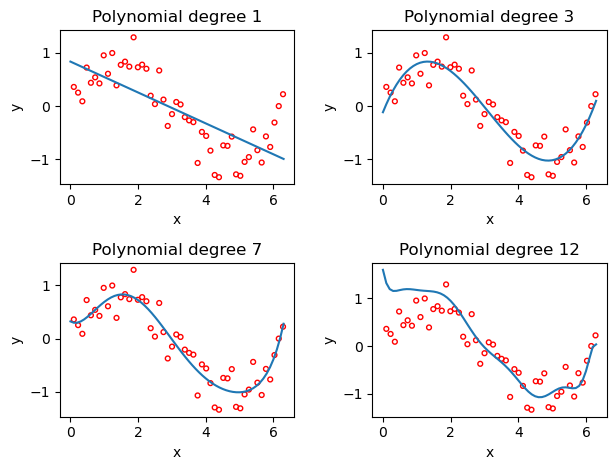

In [21]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [22]:
def my_split_data(x,y,ratio,seed=1):

    np.random.seed(seed)

    num_rows = len(x)

    indices = np.random.permutation(num_rows)

    index = int(np.floor(ratio*num_rows))

    tr_index = indices[:index]

    te_index = indices[index:]

    x_tr = x[tr_index]

    y_tr = y[tr_index]

    x_te = x[te_index]

    y_te = y[te_index]

    return x_tr , y_tr , x_te , y_te


In [23]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te
    # ***************************************************

Then, test your `split_data` function below.

In [24]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr , y_tr , x_te , y_te = my_split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tr_po = build_poly(x_tr,degree)
    te_po = build_poly(x_te,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    tr_weights,_ = my_least_squares(y_tr,tr_po)
    te_weights,_ = my_least_squares(y_te,te_po)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = float(compute_mse(y_tr,tr_po,tr_weights))
    rmse_te = float(compute_mse(y_tr,tr_po,te_weights))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [25]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.122, Testing RMSE=0.126
proportion=0.9, degree=3, Training RMSE=0.035, Testing RMSE=0.283
proportion=0.9, degree=7, Training RMSE=0.032, Testing RMSE=4151.094
proportion=0.9, degree=12, Training RMSE=6.999, Testing RMSE=639622.788
proportion=0.5, degree=1, Training RMSE=0.103, Testing RMSE=0.137
proportion=0.5, degree=3, Training RMSE=0.028, Testing RMSE=0.041
proportion=0.5, degree=7, Training RMSE=0.027, Testing RMSE=0.038
proportion=0.5, degree=12, Training RMSE=0.082, Testing RMSE=0.100
proportion=0.1, degree=1, Training RMSE=0.091, Testing RMSE=0.135
proportion=0.1, degree=3, Training RMSE=0.004, Testing RMSE=0.058
proportion=0.1, degree=7, Training RMSE=9.883, Testing RMSE=0.050
proportion=0.1, degree=12, Training RMSE=2315.081, Testing RMSE=0.654


# 3 Ridge Regression
Please fill in the function below.

In [30]:
np.logspace(-5,0,15)

array([1.00000000e-05, 2.27584593e-05, 5.17947468e-05, 1.17876863e-04,
       2.68269580e-04, 6.10540230e-04, 1.38949549e-03, 3.16227766e-03,
       7.19685673e-03, 1.63789371e-02, 3.72759372e-02, 8.48342898e-02,
       1.93069773e-01, 4.39397056e-01, 1.00000000e+00])

In [34]:
2 * tx.shape[0] * 1.0e-05 * np.identity(tx.shape[1]) 

array([[0.2, 0. ],
       [0. , 0.2]])

In [44]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    aI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)
    # ***************************************************

In [45]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ridge regression
        weight = ridge_regression(y_tr, tx_tr, lambda_)
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, tx_tr, weight)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, tx_te, weight)))
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.193, 

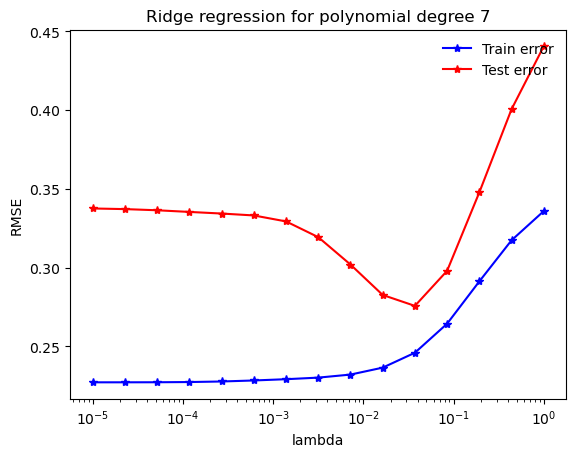

In [46]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)